# 8. Optimum Index Factor (OIF)

### Por: David Alonso Rueda Rodríguez

### Objetivo:
- Calcular el OIF de imágenes satelitales

#### Esta actividad requiere la ejecución de las siguentes librerías:

- gdal
- numpy
- glob

## Fuente Original:


In [1]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
import rasterio as ras

In [148]:
urls = '../Datos/Landsat/*.TIF'
archivos = glob.glob(urls)
archivos

['../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B1.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B10.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B11.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B2.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B3.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B4.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B5.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B6.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B7.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B8.TIF',
 '../Datos/Landsat/LC08_L1TP_009057_20190903_20190917_01_T1_B9.TIF']

In [147]:
dataset = gdal.Open(archivos[1])
matriz = dataset.ReadAsArray()

In [24]:
matriz_nan = np.where(matriz == 0, np.nan, matriz)
print(np.nanmean(matriz_nan))
print('Media   {}'   .format(np.nanmean(matriz_nan)))
print('Minimos {}'   .format(np.nanmin(matriz_nan)))
print('Maximos {}'   .format(np.nanmax(matriz_nan)))

26083.76016429494
Media   26083.76016429494
Minimos 9735.0
Maximos 39351.0


In [160]:
hist, bin_edges = np.histogram(matriz, bins = range(0, np.max(matriz), 500), density=False)
hist1, bin_edges_nan= np.histogram(matriz_nan, bins = range(0, np.max(matriz), 500), density=False)

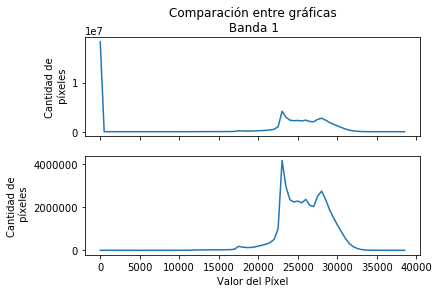

In [129]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.set_title('Comparación entre gráficas\n Banda {}' .format(1))
ax2.set_xlabel('Valor del Píxel')
ax1.set_ylabel('Cantidad de\n píxeles')
ax2.set_ylabel('Cantidad de\n píxeles')
ax1.plot(bin_edges[:-1], hist)
ax2.plot(bin_edges_nan[:-1], hist1)
plt.show()